In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from helper import pca_plots
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples


In [3]:
# Read the data from the file `wine.csv`. Do not shuffle the data 
df = pd.read_csv("wine.csv")

# Take a quick look at the dataset
display(df.head())


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PREPROCESS THE DATA

In [4]:
### edTest(test_std) ###

# Preprocess the data for clustering via mean-centering and 
# scaling by the standard deviation
# Ensure that the rows and columns are in the same order as the original dataframe

X_std = df.copy()

for col in X_std.columns:
    # Mean center and scale by std dev
    X_std[col] = (X_std[col] - X_std[col].mean()) / X_std[col].std()

# Store the resulting standardized data as a Pandas dataframe



### K-MEANS AND SILHOUETTE SCORE

In [7]:
### edTest(test_avgsil) ###

# List to store the average silhouette scores 
avg_sil_scores = [ ]

# List of k values from 1 to 15
k = range(1,16)

# Perform k-means clustering for all the k values defined above
# Calculate the average silhouette scores and store in the list defined above
# For each k value, use 42 initializations, init='random' and a random state of 109

# Your code here
for i in k:
    kmeans = KMeans(n_clusters=i, init='random', n_init=42, random_state=109)
    kmeans.fit(X_std)
    labels = kmeans.labels_
    if i==1:
        avg_sil_scores.append(0)
    else:
        avg_sil_scores.append(silhouette_score(X_std, labels))



In [8]:
### edTest(test_best_k) ###

# Get the optimal k based on the average silhouette scores
best_k = np.argmax(avg_sil_scores)


### VISUALIZATION

**WARNING!:** Do not make a call to `plt.show()`. This would cause tests to fail as they need to inspect the axis.

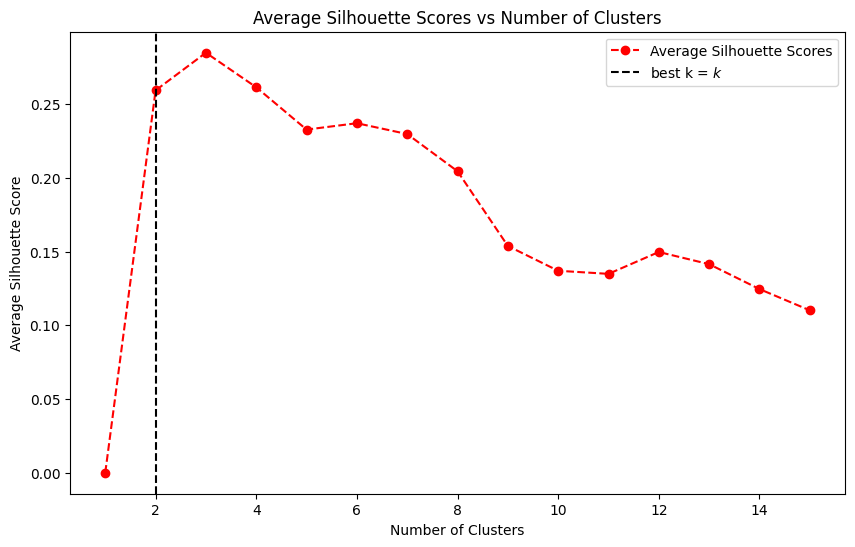

In [9]:
### edTest(test_avgsilplot) ###

# Plot to visualizes how the average silhouette changes with the number of clusters
# Use axes object to pass the test cases 

# PLOT REQUIREMENTS
# Plot the silhouette scores using a red, dashed line with circle markers
# Draw a black, dotted, vertical line corresponding to the best k-value
# Give the vertical line the legend label "best k = K" replacing 'K' 
# with the correct value. Ensure you use latex for `k` in `best k`
# Display the legend. Have no other legends expect the best K
# Ensure appropriate title and axis labels
# Ensure x-ticks make sense based on the plot

plt.figure(figsize=(10,6))
plt.plot(k, avg_sil_scores, 'r--o', label='Average Silhouette Scores')
plt.axvline(best_k, linestyle='--', color='k', label=r'best k = $k$')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Scores vs Number of Clusters')
plt.legend()
fig = plt.gcf()


<span style='color:red'>The cells below run several tests against your plot above. DO NOT DELETE


In [152]:
### edTest(test_silstyle) ###

In [153]:
### edTest(test_vertline) ###

In [ ]:
### edTest(test_vertstyle) ###

In [154]:
### edTest(test_legend) ###

In [155]:
### edTest(test_title) ###

In [ ]:
### edTest(test_plotlabels) ###

In [156]:
### edTest(test_ticks) ###

In [10]:
### edTest(test_bestlabels) ###

# Get the clsuter labels resulting from KMeans using best_k clusters 
# Ensure 42 initializations, init=random, and a random state of 109
best_labels = KMeans(n_clusters=best_k, init='random', n_init=42, random_state=109).fit_predict(X_std)


In [11]:
### edTest(test_ind_sil) ###

# With best_labels, compute the silhouette score for each observation using 
# the sillhouette_samples method imported above on the standardized data
ind_sil = silhouette_samples(X_std, best_labels)


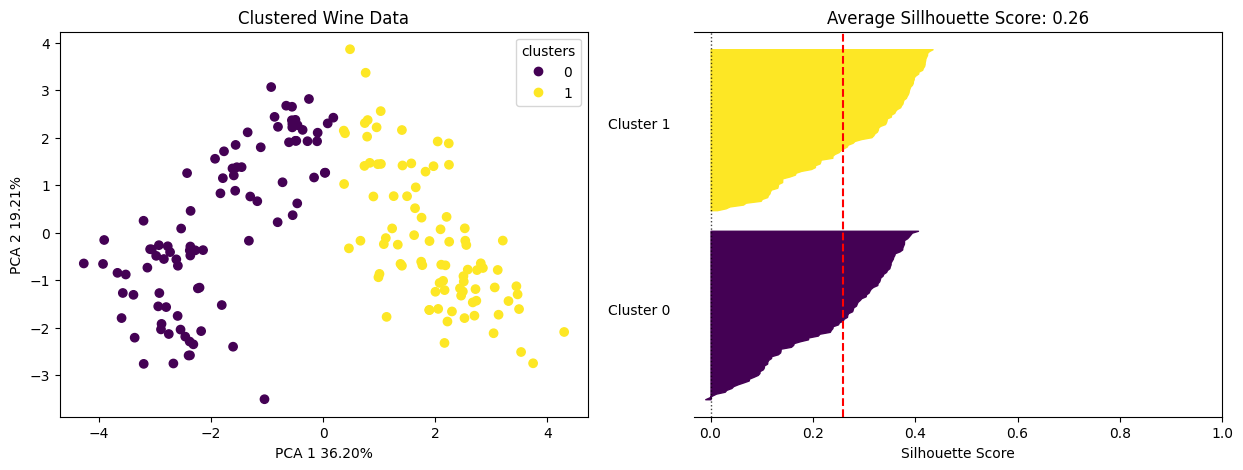

In [12]:
# Helper function to plot the first 2 principal components of the scaled data
# along with the sillhouette plot generated from ind_sil
# Colors reflect each observation's cluster label in best_labels
pca_plots(X_std, best_labels, ind_sil)


In [16]:
### edTest(test_misclass) ###

# Dictionary to store the cluster labels as keys and number of 
# potential mistakes as values
potential_misclassifications = {}

# Determine the number of individual observations may have been assigned to the wrong cluster using using the individual sillhouette scores stored in  ind_sil and the cluster labels best_labels
# Save this in the dictionary potential_misclassifications. Ensure both key and value are integers

# print(ind_sil)
# print(best_labels)

for score, label in zip(ind_sil, best_labels):
    if label not in potential_misclassifications:
        potential_misclassifications[label] = 0
    if score < 0:
        if label in potential_misclassifications:
            potential_misclassifications[label] += 1
        else:
            potential_misclassifications[label] = 1

# print(potential_misclassifications)
